<a href="https://colab.research.google.com/github/kreshuklab/vem-primer-examples/blob/main/mitochondria/3_instance_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # vEM-Mitochondria: Instance Segmentation
 
 Lorem ipsum

## Google Colab

IMPORTANT: Run the next cells until `Instance Segmentation` only if you execute this notebook on Google Colab. If you run this notebook locally, you need to set up a python environment with the correct dependencies beforehand, check out [these instructions](https://github.com/kreshuklab/vem-primer-examples#setting-up-conda-environments-advanced).

In [ ]:
# TODO mount google drive

## Instance Segmentation

Lorem ipsum

In [23]:
# import all the required dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import zarr
from skimage.measure import label
from skimage.segmentation import watershed
from numcodecs import GZip

In [24]:
# TODO adapt to gdrive
path = "./mito-em-data/MitoEM-H-predictions.ome.zarr"
store = zarr.DirectoryStore(path)

In [25]:
# apply connected components labeling with foreground and boundary pmaps
def connected_components(foreground, boundaries, threshold=0.5, min_size=250):
    seeds = label(np.clip(foreground - boundaries, 0, 1) > threshold)
    mask = foreground > threshold
    seg = watershed(boundaries, markers=seeds, mask=mask)
    # apply size filter
    seg_ids, sizes = np.unique(seg, return_counts=True)
    bg_ids = seg_ids[sizes < min_size]
    seg[np.isin(seg, bg_ids)] == 0
    return seg

In [26]:
# TODO adapt everything so that it works out of core
# load the (probabilistic) semantic segmentation
with zarr.open(path, "a") as f:
    foreground = f["foreground"][:]
    boundaries = f["boundaries"][:]
    chunks = f["boundaries"].chunks
    instance_seg = connected_components(foreground, boundaries)
    f.create_dataset("instance_segmentation", data=instance_seg, chunks=chunks, compression=GZip())

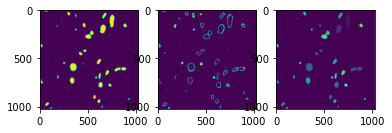

In [27]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(foreground[10])
ax[1].imshow(boundaries[10])
ax[2].imshow(instance_seg[10])
plt.show()